In [2404]:
import numpy as np
import pandas as pd
import imblearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import *
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
%matplotlib inline


In [2405]:
df = pd.read_csv('https://raw.githubusercontent.com/5unof4Beach/IOT-2022/master/city_day.csv') 

Data Cleansing

In [2406]:
df.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [2407]:
df.isna().sum() 

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [2408]:
df.drop_duplicates(keep='first', inplace=True)
df = df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [2409]:
df.head() 

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [2410]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# Chọn số lượng dòng

In [2411]:
df = df.head(10000)

# Set các giá trị NaN thành 0

In [2412]:
print(df.columns.difference([df.columns[-1]], sort=False)) 

df = df.fillna(0) 
for x in df.columns.difference([df.columns[-1]], sort=False):
    df[x] = pd.to_numeric(df[x], errors='coerce')
 
df = df.drop([df.columns[i] for i in range(0,2)], axis=1)
# df = df.mask(df==0).fillna(df.mean()) 


Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI'],
      dtype='object')


# Normalize dữ liệu

In [2413]:
from sklearn import preprocessing
df = df.drop(df.columns[-1], axis = 1)
lastCol = df.columns[-1] 
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(df)
df = pd.DataFrame(d, columns=df.columns)
df.to_csv(r'./File Name.csv', index=False) 
df.head()


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,0.0,0.0,0.002355,0.062393,0.044797,0.0,0.005233,0.148538,0.821031,0.000000,0.000049,0.000000,0.0
1,0.0,0.0,0.002483,0.053729,0.042994,0.0,0.005517,0.131933,0.209690,0.009391,0.013365,0.027428,0.0
2,0.0,0.0,0.044538,0.066091,0.077578,0.0,0.098970,0.156223,0.189004,0.017352,0.039852,0.016370,0.0
3,0.0,0.0,0.004351,0.063283,0.046939,0.0,0.009670,0.099903,0.222126,0.011304,0.024640,0.007275,0.0
4,0.0,0.0,0.056568,0.073351,0.098631,0.0,0.125704,0.211361,0.242012,0.017888,0.045903,0.020226,0.0


In [2414]:
# Loại bỏ tất cả các hàng có giá trị AQI_Bucket = 0
df = df[df.AQI != 0] 
 
categorical_vars = [lastCol]

y = df[categorical_vars]
X = df[[df.columns[i] for i in range(0,9)]]  
# X = df[[df.columns[i] for i in [0,3,6]]]  
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

X_train
y_train 

(6048, 9) (2592, 9) (6048, 1) (2592, 1)


,AQI
6935,0.115666
3132,0.020986
3779,0.040996
6281,0.034163
3874,0.071742
...,...
6778,0.052709
6172,0.038067
6372,0.119082
1515,0.385066


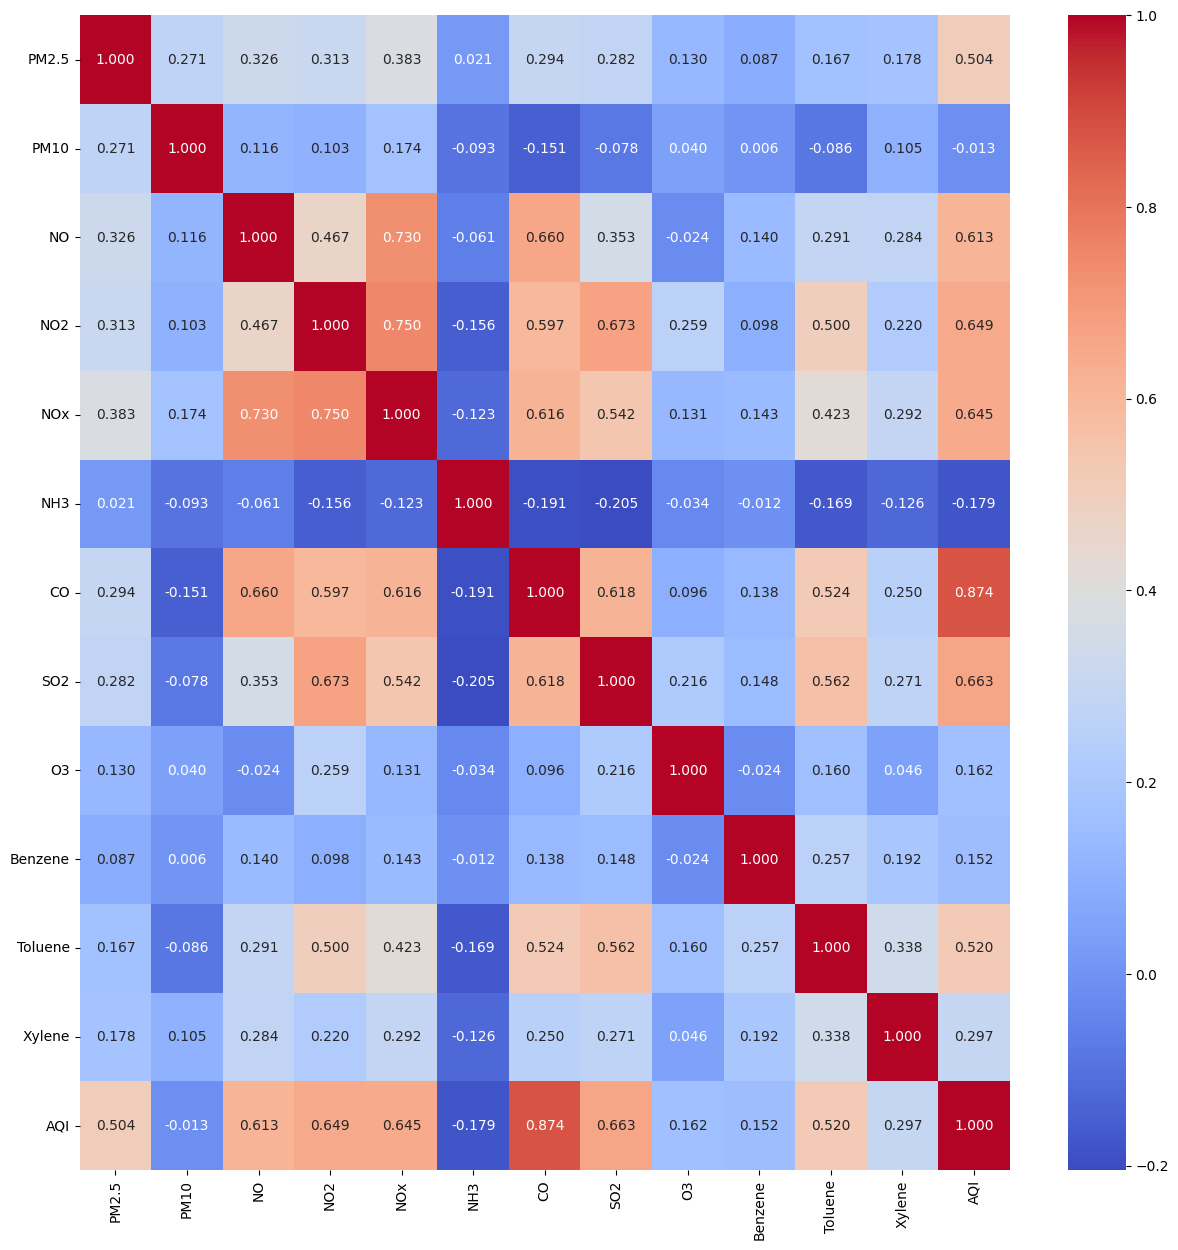

In [2415]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot = True,cmap='coolwarm',fmt='.3f', xticklabels=df.columns, yticklabels=df.columns)
figure= plt.gcf()
figure.set_size_inches(15,15)
plt.show()

Liệt kê chỉ số tương quan của các cặp từ nhỏ đến lớn

In [2416]:
corr_matrix.unstack().sort_values().drop_duplicates()

NH3    SO2       -0.204882
       CO        -0.190805
       AQI       -0.179318
       Toluene   -0.168597
NO2    NH3       -0.155799
                    ...   
       SO2        0.673237
NO     NOx        0.729936
NOx    NO2        0.750193
AQI    CO         0.874144
PM2.5  PM2.5      1.000000
Length: 79, dtype: float64

# Linear Regresion của Sklearn

In [2417]:
model = LinearRegression()
model.fit(X_train, y_train )

accuracy = model.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100)) 

Accuracy: 87.33


# Linear regression code chay

In [2418]:
import numpy as np
def r2_score(y_true, y_pred):
    corr_matrix = np.corrcoef(y_true, y_pred)
    corr = corr_matrix[0, 1]
    return corr ** 2 

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

class LinearRegression2:
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = X.to_numpy()
        y = y.to_numpy().flatten()

        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0 
        # gradient descent
        for _ in range(self.n_iters):
            y_predicted = np.dot(X, self.weights) + self.bias
            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y) 
            # update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        y_approximated = np.dot(X, self.weights) + self.bias
        return y_approximated

In [2420]:
model2 = LinearRegression2()    
model2.fit(X_train, y_train)

predictions = model2.predict(X_test).flatten() 
predictions_lib = model.predict(X_test).flatten()

mse = mean_squared_error(y_test.to_numpy().flatten(), predictions)

print("MSE:", mse)

accu = r2_score(y_test.to_numpy().flatten(), predictions)
accu2 = r2_score(y_test.to_numpy().flatten(), predictions_lib) 

print("Accuracy Lib:", accu2)
print("Accuracy Custom:", accu)

MSE: 0.009213268652589117
Accuracy Lib: 0.8733293462478804
Accuracy Custom: 0.5558746118186675
